<a href="https://colab.research.google.com/github/reemaranisahoo1996/Data-Analysis-using-Python-PowerBI/blob/main/Patient%20Waitlist%20Analysis/Patients_Waitlist_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imported Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Imported Data

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/Mapping_Specialty.csv')

In [ ]:
df

,Specialty,Specialty Group
0,Anaesthetics,Respiratory
1,Cardiology,Heart
2,Cardio-Thoracic Surgery,Heart
3,Child/Adolescent Psychiatry,Psychatry
4,Clinical (Medical) Genetics,Genes
...,...,...
73,Microbiology,General
74,Substance Abuse,General
75,Occupational Medicine,General
76,Accident & Emergency,General


In [ ]:
df_in_1=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/IN_WL%202018.csv')
df_in_2=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/IN_WL%202019.csv')
df_in_3=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/IN_WL%202020.csv')
df_in_4=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/IN_WL%202021.csv')

In [ ]:
df_op_1=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/Op_WL%202018.csv')
df_op_2=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/Op_WL%202019.csv')
df_op_3=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/Op_WL%202020.csv')
df_op_4=pd.read_csv('https://raw.githubusercontent.com/reemaranisahoo1996/DATA/main/Op_WL%202021.csv')

# Data Cleaning and Transforming

In [ ]:
df_in=pd.concat([df_in_1,df_in_2,df_in_3,df_in_4])

In [ ]:
df_in

,Archive_Date,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total,Unnamed: 8
0,31-01-2018,0,Small Volume Specialities,Inpatient,Child,0-15,6-9 Months,1,NaN
1,31-01-2018,0,Small Volume Specialities,Inpatient,Child,16-64,9-12 Months,1,NaN
2,31-01-2018,400,Endocrinology,Day Case,Child,0-15,3-6 Months,1,NaN
3,31-01-2018,400,Endocrinology,Day Case,Child,0-15,12-15 Months,1,NaN
4,31-01-2018,600,Otolaryngology (ENT),Day Case,Child,0-15,0-3 Months,14,NaN
...,...,...,...,...,...,...,...,...,...
15882,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,9-12 Months,10,NaN
15883,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,12-15 Months,34,NaN
15884,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,15-18 Months,33,NaN
15885,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,18+ Months,37,NaN


In [ ]:
df_in.drop(['Unnamed: 8'],axis=1,inplace=True)

In [ ]:
df_in

,Archive_Date,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total
0,31-01-2018,0,Small Volume Specialities,Inpatient,Child,0-15,6-9 Months,1
1,31-01-2018,0,Small Volume Specialities,Inpatient,Child,16-64,9-12 Months,1
2,31-01-2018,400,Endocrinology,Day Case,Child,0-15,3-6 Months,1
3,31-01-2018,400,Endocrinology,Day Case,Child,0-15,12-15 Months,1
4,31-01-2018,600,Otolaryngology (ENT),Day Case,Child,0-15,0-3 Months,14
...,...,...,...,...,...,...,...,...
15882,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,9-12 Months,10
15883,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,12-15 Months,34
15884,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,15-18 Months,33
15885,31-03-2021,8003,Pain Relief,Day Case,Adult,65+,18+ Months,37


In [ ]:
df_op=pd.concat([df_op_1, df_op_2, df_op_3, df_op_4])

In [ ]:
df_op['Case_Type']='Outpatient'

In [ ]:
df_op

,Archive_Date,Specialty_HIPE,Speciality,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type
0,31-01-2018,100.0,Cardiology,Child,0-15,0-3 Months,167,Outpatient
1,31-01-2018,100.0,Cardiology,Child,0-15,3-6 Months,157,Outpatient
2,31-01-2018,100.0,Cardiology,Child,0-15,6-9 Months,106,Outpatient
3,31-01-2018,100.0,Cardiology,Child,0-15,9-12 Months,85,Outpatient
4,31-01-2018,100.0,Cardiology,Child,0-15,12-15 Months,83,Outpatient
...,...,...,...,...,...,...,...,...
22516,31-03-2021,7800.0,Urology,Adult,16-64,18 Months +,18,Outpatient
22517,31-03-2021,7800.0,Urology,Adult,65+,3-6 Months,9,Outpatient
22518,31-03-2021,7800.0,Urology,Adult,65+,6-9 Months,2,Outpatient
22519,31-03-2021,8003.0,Pain Relief,Adult,65+,15-18 Months,15,Outpatient


In [ ]:
# prompt: rename the Speciality column in df_op to Speciality_Name

df_op.rename(columns = {'Speciality':'Speciality_Name'}, inplace = True)


In [ ]:
df_op.rename(columns = {'Speciality':'Specialty_Name'}, inplace = True)

In [ ]:
df_op

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type
0,31-01-2018,100.0,Cardiology,Child,0-15,0-3 Months,167,Outpatient
1,31-01-2018,100.0,Cardiology,Child,0-15,3-6 Months,157,Outpatient
2,31-01-2018,100.0,Cardiology,Child,0-15,6-9 Months,106,Outpatient
3,31-01-2018,100.0,Cardiology,Child,0-15,9-12 Months,85,Outpatient
4,31-01-2018,100.0,Cardiology,Child,0-15,12-15 Months,83,Outpatient
...,...,...,...,...,...,...,...,...
22516,31-03-2021,7800.0,Urology,Adult,16-64,18 Months +,18,Outpatient
22517,31-03-2021,7800.0,Urology,Adult,65+,3-6 Months,9,Outpatient
22518,31-03-2021,7800.0,Urology,Adult,65+,6-9 Months,2,Outpatient
22519,31-03-2021,8003.0,Pain Relief,Adult,65+,15-18 Months,15,Outpatient


In [ ]:
df1=pd.concat([df_in,df_op])

In [ ]:
df1

,Archive_Date,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total
0,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,0-15,6-9 Months,1
1,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,16-64,9-12 Months,1
2,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,3-6 Months,1
3,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,12-15 Months,1
4,31-01-2018,600.0,Otolaryngology (ENT),Day Case,Child,0-15,0-3 Months,14
...,...,...,...,...,...,...,...,...
22516,31-03-2021,7800.0,Urology,Outpatient,Adult,16-64,18 Months +,18
22517,31-03-2021,7800.0,Urology,Outpatient,Adult,65+,3-6 Months,9
22518,31-03-2021,7800.0,Urology,Outpatient,Adult,65+,6-9 Months,2
22519,31-03-2021,8003.0,Pain Relief,Outpatient,Adult,65+,15-18 Months,15


# Insights Requirements


*   Total Wait list Comparison (CY -LY)
*   Wait list by Case Type
*   waitlist analysis by TimeBand vs AGe Band (stacked Bar Chart)
*   Top 5 Waitlist by specialty
*   Monthly waitlist Analysis by Case Type (in)
*   Monthly waitlist Analysis by Case Type (Op)





In [ ]:
df1['Date']=pd.to_datetime(df1['Archive_Date'])

<ipython-input-127-39c8535556a2>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date']=pd.to_datetime(df1['Archive_Date'])


In [ ]:
df1['Month']=df1['Date'].dt.month

In [ ]:
df1['Year']=df1['Date'].dt.year

In [ ]:
df1

,Archive_Date,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total,Date,Month,Year
0,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,0-15,6-9 Months,1,2018-01-31,1,2018
1,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,16-64,9-12 Months,1,2018-01-31,1,2018
2,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,3-6 Months,1,2018-01-31,1,2018
3,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,12-15 Months,1,2018-01-31,1,2018
4,31-01-2018,600.0,Otolaryngology (ENT),Day Case,Child,0-15,0-3 Months,14,2018-01-31,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
22516,31-03-2021,7800.0,Urology,Outpatient,Adult,16-64,18 Months +,18,2021-03-31,3,2021
22517,31-03-2021,7800.0,Urology,Outpatient,Adult,65+,3-6 Months,9,2021-03-31,3,2021
22518,31-03-2021,7800.0,Urology,Outpatient,Adult,65+,6-9 Months,2,2021-03-31,3,2021
22519,31-03-2021,8003.0,Pain Relief,Outpatient,Adult,65+,15-18 Months,15,2021-03-31,3,2021


In [ ]:
wl_by_year=df1.groupby('Year')['Total'].sum()

In [ ]:
wl_by_year

,Total
Year,
2018,7039493
2019,7495574
2020,7984923
2021,2120979


<Axes: xlabel='Year'>

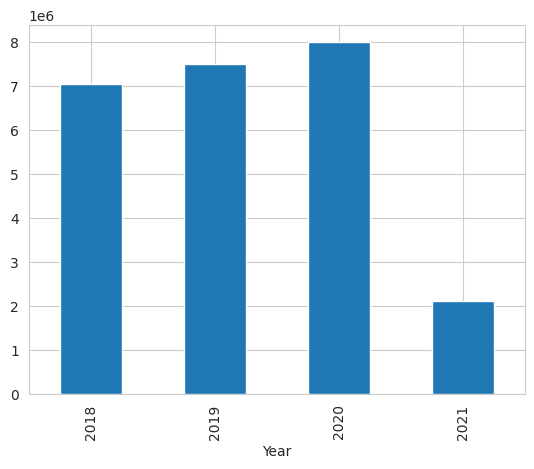

In [ ]:
wl_by_year.plot(kind='bar')

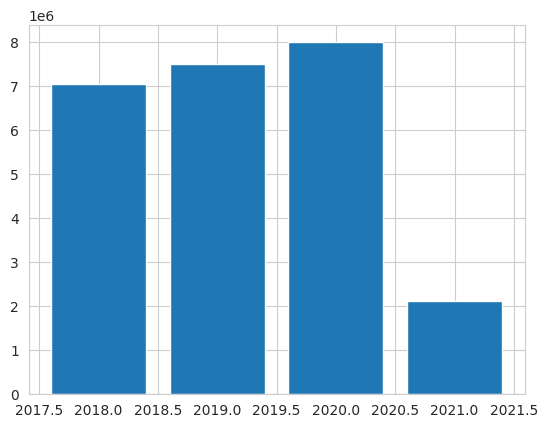

In [ ]:
plt.bar(wl_by_year.index, wl_by_year.values)
plt.show()

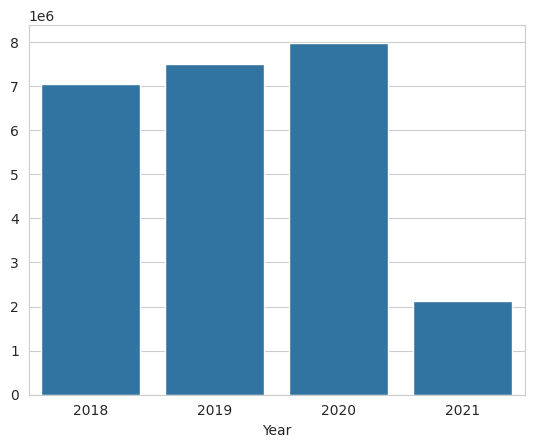

In [ ]:
sns.barplot(x=wl_by_year.index, y=wl_by_year.values, legend="auto")
sns.set_style('whitegrid')

In [ ]:
wl_by_year.loc[wl_by_year.index.max()]

2120979

In [ ]:
wl_by_year.loc[wl_by_year.index.max()-1]

7984923

In [ ]:
wl_by_case=df1.groupby('Case_Type')['Total'].sum()

<Axes: ylabel='Total'>

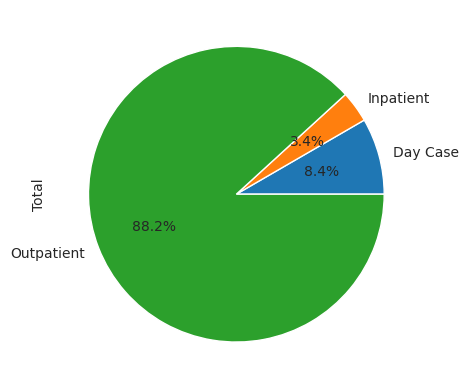

In [ ]:
wl_by_case.plot(kind='pie', autopct='%1.1f%%')

In [ ]:
df1.groupby(['Time_Bands','Age_Profile'])['Total'].sum()

Time_Bands     Age_Profile
  0-3 Months   0-15             83963
               16-64           588343
               65+             371586
  3-6 Months   0-15             57348
               16-64           369805
               65+             231276
  6-9 Months   0-15             38148
               16-64           234270
               65+             140121
  9-12 Months  0-15             27963
               16-64           156424
               65+              80494
 0-3 Months     0-15           280719
               0-15            543238
               16-64          3689350
               65+            1427056
 12-15 Months  0-15             20177
               16-64           103333
               65+              48434
 15-18 Months  0-15             13263
               16-64            67814
               65+              30377
 3-6 Months     0-15           173989
               0-15            366593
               16-64          2273801
               65+             846105
 6-9 Months     0-15           123188
               0-15            275567
               16-64          1672299
               65+             617951
 9-12 Months    0-15            93162
               0-15            221932
               16-64          1325498
               65+             490963
12-15 Months    0-15            74974
               0-15            177841
               16-64          1037171
               65+             385883
15-18 Months    0-15            60290
               0-15            141522
               16-64           795684
               65+             300476
18 Months +    0-15            517672
               16-64          2048903
               65+             795697
18+ Months      0-15           184190
               0-15             26759
               16-64           734900
               65+             273977
Name: Total, dtype: int64

In [ ]:
df1['Time_Bands']=df1['Time_Bands'].str.strip()

In [ ]:
# df1['Time_Bands']=df1['Time_Bands'].str.replace('nan','No Input')

In [ ]:
df1['Time_Bands']=df1['Time_Bands'].str.replace('18 Months +','18+ Months')

In [ ]:
df1['Time_Bands'].unique()

array(['6-9 Months', '9-12 Months', '3-6 Months', '12-15 Months',
       '0-3 Months', '15-18 Months', '18+ Months', nan], dtype=object)

In [ ]:
df1['Age_Profile']=df1['Age_Profile'].str.strip()

In [ ]:
df1['Age_Profile'].unique()

array(['0-15', '16-64', '65+', nan], dtype=object)

In [ ]:
wl_by_time_age=df1.groupby(['Time_Bands','Age_Profile'])['Total'].sum()

In [ ]:
wl_by_time_age

Time_Bands    Age_Profile
0-3 Months    0-15            907920
              16-64          4277693
              65+            1798642
12-15 Months  0-15            272992
              16-64          1140504
              65+             434317
15-18 Months  0-15            215075
              16-64           863498
              65+             330853
18+ Months    0-15            728621
              16-64          2783803
              65+            1069674
3-6 Months    0-15            597930
              16-64          2643606
              65+            1077381
6-9 Months    0-15            436903
              16-64          1906569
              65+             758072
9-12 Months   0-15            343057
              16-64          1481922
              65+             571457
Name: Total, dtype: int64

<Axes: xlabel='Time_Bands'>

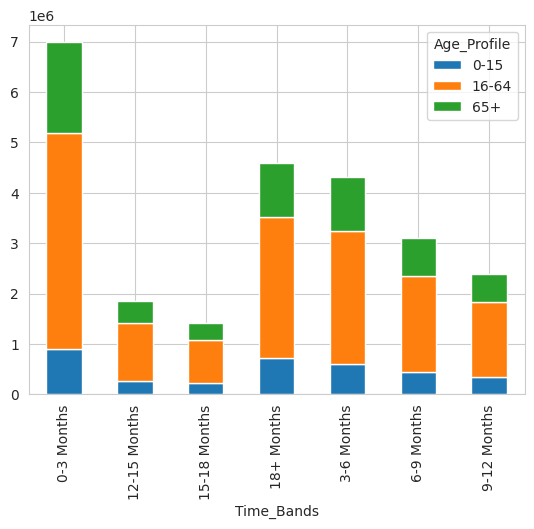

In [ ]:
wl_by_time_age.unstack().plot(kind='bar', stacked=True)

In [ ]:
df1.groupby('Specialty_Name')['Total'].mean().sort_values(ascending=False).head(5)

,Total
Specialty_Name,
Paediatric Dermatology,167.891678
Paediatric ENT,147.550353
Paed Orthopaedic,114.501869
Accident & Emergency,111.185185
Paed Cardiology,101.765178


In [ ]:
df2=df1.copy()

In [ ]:
# prompt: how to get date in the format Month_name and Year

df2['Month_Year'] = df2['Date'].dt.strftime('%B')


In [ ]:
df2

,Archive_Date,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total,Date,Month,Year,Month_Year
0,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,0-15,6-9 Months,1,2018-01-31,1,2018,January
1,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,16-64,9-12 Months,1,2018-01-31,1,2018,January
2,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,3-6 Months,1,2018-01-31,1,2018,January
3,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,12-15 Months,1,2018-01-31,1,2018,January
4,31-01-2018,600.0,Otolaryngology (ENT),Day Case,Child,0-15,0-3 Months,14,2018-01-31,1,2018,January
...,...,...,...,...,...,...,...,...,...,...,...,...
22516,31-03-2021,7800.0,Urology,Outpatient,Adult,16-64,18+ Months,18,2021-03-31,3,2021,March
22517,31-03-2021,7800.0,Urology,Outpatient,Adult,65+,3-6 Months,9,2021-03-31,3,2021,March
22518,31-03-2021,7800.0,Urology,Outpatient,Adult,65+,6-9 Months,2,2021-03-31,3,2021,March
22519,31-03-2021,8003.0,Pain Relief,Outpatient,Adult,65+,15-18 Months,15,2021-03-31,3,2021,March


In [ ]:
df_case_in=df2[df2['Case_Type'].str.contains('Inpatient')]

In [ ]:
df_case_in

,Archive_Date,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total,Date,Month,Year,Month_Year
0,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,0-15,6-9 Months,1,2018-01-31,1,2018,January
1,31-01-2018,0.0,Small Volume Specialities,Inpatient,Child,16-64,9-12 Months,1,2018-01-31,1,2018,January
9,31-01-2018,600.0,Otolaryngology (ENT),Inpatient,Child,0-15,0-3 Months,44,2018-01-31,1,2018,January
10,31-01-2018,600.0,Otolaryngology (ENT),Inpatient,Child,0-15,3-6 Months,12,2018-01-31,1,2018,January
11,31-01-2018,600.0,Otolaryngology (ENT),Inpatient,Child,0-15,6-9 Months,5,2018-01-31,1,2018,January
...,...,...,...,...,...,...,...,...,...,...,...,...
15868,31-03-2021,7800.0,Urology,Inpatient,Adult,65+,9-12 Months,4,2021-03-31,3,2021,March
15869,31-03-2021,7800.0,Urology,Inpatient,Adult,65+,12-15 Months,11,2021-03-31,3,2021,March
15870,31-03-2021,7800.0,Urology,Inpatient,Adult,65+,15-18 Months,9,2021-03-31,3,2021,March
15871,31-03-2021,7800.0,Urology,Inpatient,Adult,65+,18+ Months,25,2021-03-31,3,2021,March


In [ ]:
monthly_wl_case_in=df_case_in.groupby(['Year', 'Month'])['Total'].sum()

In [ ]:
monthly_wl_case_in


Year  Month
2018  1        22937
      2        22859
      3        22963
      4        22683
      5        22801
      6        22397
      7        21912
      8        21278
      9        20993
      10       20714
      11       20229
      12       19880
2019  1        20940
      2        20860
      3        20852
      4        20640
      5        20609
      6        20503
      7        20412
      8        20406
      9        20671
      10       20740
      11       20584
      12       20224
2020  1        20616
      2        20563
      3        22900
      4        24369
      5        24663
      6        24103
      7        23156
      8        22315
      9        21917
      10       21831
      11       21043
      12       21120
2021  1        22765
      2        22558
      3        22342
Name: Total, dtype: int64

<Axes: xlabel='Year,Month'>

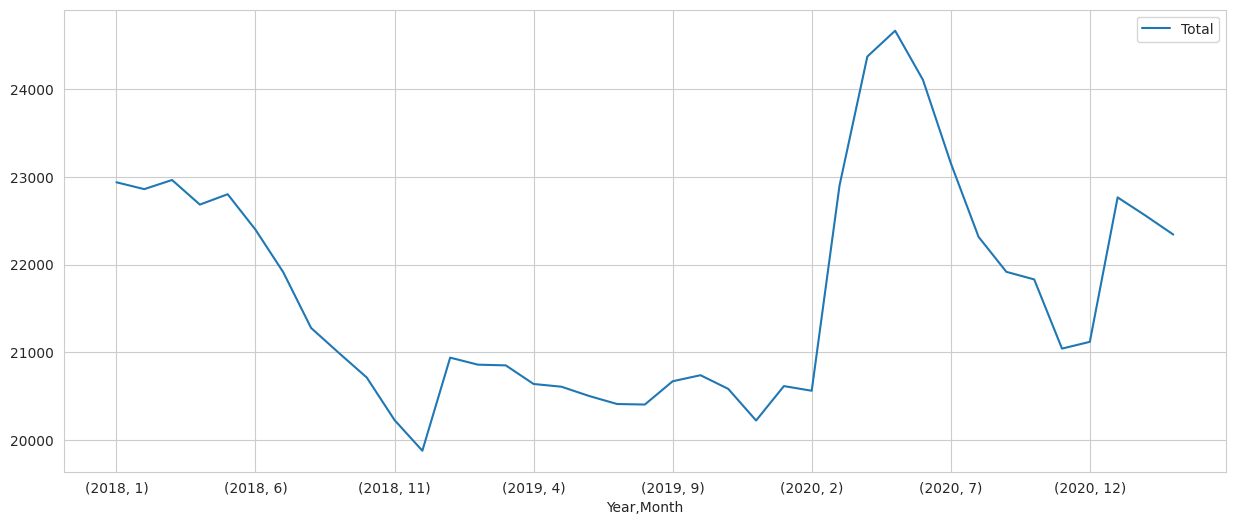

In [ ]:
monthly_wl_case_in.plot(kind='line', legend="auto", figsize=(15,6))

In [ ]:
df_case_day=df2[df2['Case_Type'].str.contains('Day Case')]


In [ ]:
df_case_day

,Archive_Date,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total,Date,Month,Year,Month_Year
2,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,3-6 Months,1,2018-01-31,1,2018,January
3,31-01-2018,400.0,Endocrinology,Day Case,Child,0-15,12-15 Months,1,2018-01-31,1,2018,January
4,31-01-2018,600.0,Otolaryngology (ENT),Day Case,Child,0-15,0-3 Months,14,2018-01-31,1,2018,January
5,31-01-2018,600.0,Otolaryngology (ENT),Day Case,Child,0-15,3-6 Months,2,2018-01-31,1,2018,January
6,31-01-2018,600.0,Otolaryngology (ENT),Day Case,Child,0-15,6-9 Months,1,2018-01-31,1,2018,January
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,31-03-2021,8003.0,Pain Relief,Day Case,Adult,65+,6-9 Months,18,2021-03-31,3,2021,March
15882,31-03-2021,8003.0,Pain Relief,Day Case,Adult,65+,9-12 Months,10,2021-03-31,3,2021,March
15883,31-03-2021,8003.0,Pain Relief,Day Case,Adult,65+,12-15 Months,34,2021-03-31,3,2021,March
15884,31-03-2021,8003.0,Pain Relief,Day Case,Adult,65+,15-18 Months,33,2021-03-31,3,2021,March


In [ ]:
monthly_wl_case_day=df_case_day.groupby(['Year', 'Month'])['Total'].sum()

In [ ]:
monthly_wl_case_day

Year  Month
2018  1        57267
      2        56180
      3        57095
      4        56731
      5        55795
      6        55617
      7        54244
      8        52911
      9        51725
      10       51287
      11       50760
      12       50324
2019  1        51087
      2        50345
      3        49367
      4        49655
      5        48156
      6        49168
      7        48395
      8        47984
      9        47314
      10       46771
      11       46010
      12       46339
2020  1        46687
      2        46142
      3        54848
      4        61974
      5        62283
      6        60120
      7        57127
      8        55305
      9        53985
      10       53029
      11       51800
      12       51355
2021  1        58691
      2        58378
      3        57631
Name: Total, dtype: int64

<Axes: xlabel='Year,Month'>

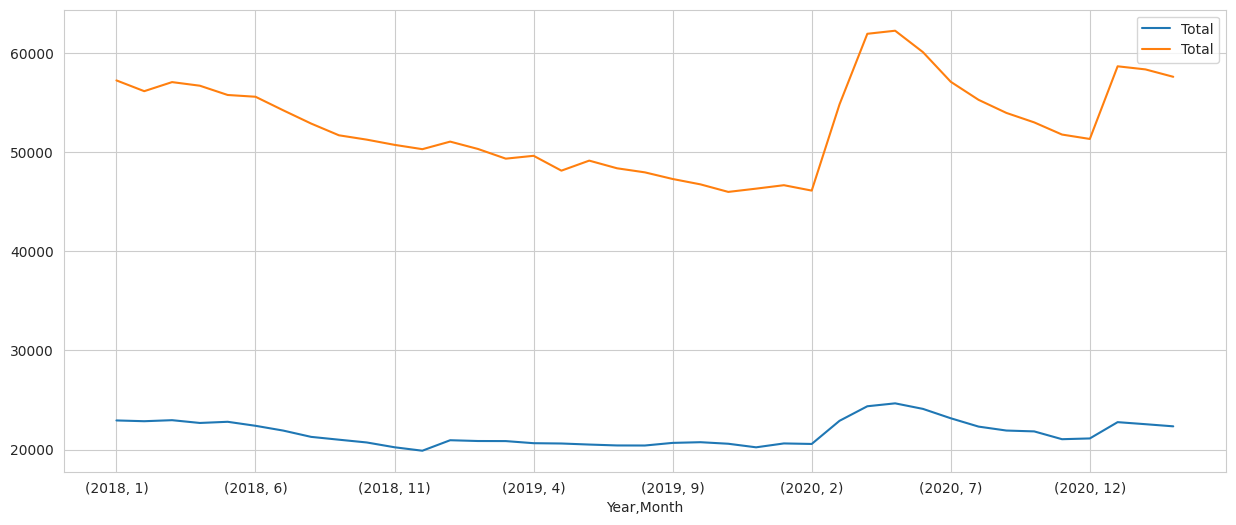

In [ ]:
from os import X_OK
monthly_wl_case_in.plot(kind='line', legend="auto", figsize=(15,6))
monthly_wl_case_day.plot(kind='line', legend="auto", figsize=(15,6))